# Final Project Tutorial: Ted Talk Analysis 
#### By Enock Gansou, Subhee Rawal


![](https://www.brilliantbreakthroughs.com/wp-content/uploads/2015/03/ted_logo.jpg)

## I. Brief Introduction

Data science can be found all around us. It is the process of using data to understand different things, and to understand the world. It is an interdisciplinary field of study that allows to uncover the insights and trends that are hiding behind data. The data we were most fascinated in analyzing was TED talks data as those are immensely popular in todays world and we were interested in exploring the statistics and finding correlations/trends behind the data.

TED is a nonprofit devoted to spreading ideas, usually in the form of short, powerful talks (18 minutes or less). TED began in 1984 as a conference where Technology, Entertainment and Design converged, and today covers almost all topics — from science to business to global issues — in more than 100 languages. Meanwhile, independently run TEDx events help share ideas in communities around the world.

## II. Tutorial Content

Welcome to a Data Science tutorial using Jupyter Notebook and Python!

For this tutorial we will be analyzing TED Talk's data, the diversity of its content, and exploring its stats. We will
use this data set to anaylze different aspects of Ted Talks such as which months the TED talks are the most viewed in and which months they excel in the most. We will futher assess the realtion between views and comments as well as language of those talks. We will further analyze the ratings given to these talks to see which are the most popular and what topics generate the most discussion in the comment section. We will also see the correaltion betwee the Ted Talk speakers professions and their popularity.

The dataset we used in our tutorial can be found at  https://www.kaggle.com/rounakbanik/ted-talks

This dataset shows information about the various TED talks that have been uploaded to the official TED.com website until September 21st, 2017. This data set contains the following file:

* ted_main.csv --> The TED main dataset contains information about all talks including number of views, number of comments, descriptions, speakers and titles. 


## III. Getting Started
#### Before getting started we will import all libaries that are needed for this project

Required Tools
For this project one will need Python 2.7 or above and the following libraries.
A commnad that can be used to install library is " pip install [Library Name]:"

Pandas: https://pandas.pydata.org/  
Numpy: http://www.numpy.org/  
Matplotlib: https://matplotlib.org/  
Plotly: https://plot.ly/  

The necessary libraries have been imported below:

In [434]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")

## IV. Data Collection : The Main TED Dataset

The main dataset that is being used for the tutorial contains information about every TED Talk that has been hosted on the TED.com website from the first one published in 2006 until September 21, 2017. 

Through the tutorial, we will give a walkthrough on how to analyze, interpret, and correlate the data from the dataset available

For the purpose of this project, we are going to be focusing on certain specific attributes that are relevant to the data from the dataset described below. 

### Parameters we will be analyzing:
* **event:** The official code of the TED/TEDx event (where the talk was held).
* **name:** The official title and the speaker.
* **views:** The number of views for the specific talk.
* **ratings:** The classification of the various ratings given to the talk. These includeinspiring, fascinating, jaw dropping, etc.)
* **comments:** The number of comments made on the talk.
* **languages:** The range/number of languages the talk is avaiable (has subtitles) for.
* **published_date:** Shows the publication of the talk on the website in the Unix timestamp.

In [435]:
df = pd.read_csv('ted_main.csv')
df = df.drop('title', 1)
df = df.drop('description', 1)
df = df.drop('num_speaker', 1)
df = df.drop('duration', 1)
df = df.drop('film_date', 1)
df = df.drop('tags', 1)
df = df.drop('related_talks', 1)
df = df.drop('url', 1)
df = df.drop('main_speaker', 1)
df = df[["event","name","views","ratings","comments","languages","speaker_occupation","published_date"]]
#df

In [436]:
# We transformed the date to only the month and the year for better analysis.
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%m-%Y'))

In [437]:
df

,event,name,views,ratings,comments,languages,speaker_occupation,published_date
0,TED2006,Ken Robinson: Do schools kill creativity?,47227110,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",4553,60,Author/educator,06-2006
1,TED2006,Al Gore: Averting the climate crisis,3200520,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",265,43,Climate advocate,06-2006
2,TED2006,David Pogue: Simplicity sells,1636292,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",124,26,Technology columnist,06-2006
3,TED2006,Majora Carter: Greening the ghetto,1697550,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",200,35,Activist for environmental justice,06-2006
4,TED2006,Hans Rosling: The best stats you've ever seen,12005869,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",593,48,Global health expert; data visionary,06-2006
5,TED2006,Tony Robbins: Why we do what we do,20685401,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...",672,36,Life coach; expert in leadership psychology,06-2006
6,TED2006,Julia Sweeney: Letting go of God,3769987,"[{'id': 3, 'name': 'Courageous', 'count': 477}...",919,31,"Actor, comedian, playwright",07-2006
7,TED2006,Joshua Prince-Ramus: Behind the design of Seat...,967741,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...",46,19,Architect,07-2006
8,TED2006,Dan Dennett: Let's teach religion -- all relig...,2567958,"[{'id': 3, 'name': 'Courageous', 'count': 562}...",852,32,"Philosopher, cognitive scientist",07-2006
9,TED2006,Rick Warren: A life of purpose,3095993,"[{'id': 21, 'name': 'Unconvincing', 'count': 8...",900,31,"Pastor, author",07-2006


Notice that, in the above table, we converted the published date column to a human readable format. This was due to the fact that the published date previosuly was in the unix timestamp format. 
Source: https://coderwall.com/p/-uuawg/how-do-i-convert-a-unix-timestamp-to-human-readable-format-in-python

In [438]:
len(df)

2550

Therefore the toal number of Ted talks that have been hosted on the TED talk website is 2550. This includes all the talks on that have been posted on this official Platform from the beginning until September 21, 2017.

## Data Processing, Data Visualiztion and Exploratory Analysis
### Part 1:  Most Popular TED talk months

![](https://media1.tenor.com/images/7a11ebc56f0c2bc865e1541c36076fe6/tenor.gif?itemid=9871761)

In [439]:
# getting all the published dates as a matrix and grouping the comments and the views by the month-year format.
date_array = df['published_date'].as_matrix()
lf = pd.DataFrame(df.groupby(date_array)["views","comments"].sum())
date_unique = np.unique(date_array)
lf['date'] = date_unique
lf['month'] = lf['date'].str.replace('-[0-9]+','')
lf['year'] = lf['date'].str.replace('([0-9]+)-','')
lf.head()

,views,comments,date,month,year
01-2007,10784266,1485,01-2007,01,2007
01-2008,29485069,2112,01-2008,01,2008
01-2009,12175001,1180,01-2009,01,2009
01-2010,40236347,4173,01-2010,01,2010
01-2011,25091234,7807,01-2011,01,2011


In [440]:
views_data = lf.pivot(index ='year', columns='month', values='views')
views_data.columns =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
views_data = views_data.transpose()
views_data

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Jan,NaN,10784266.0,29485069.0,12175001.0,40236347.0,25091234.0,25232015.0,56273958.0,41563684.0,21815609.0,48527143.0,26328176.0
Feb,NaN,7606504.0,9548900.0,34291856.0,30844287.0,22532006.0,48166958.0,35099990.0,27992456.0,35245193.0,46850732.0,28963334.0
Mar,NaN,NaN,32504953.0,43874636.0,32236813.0,46320883.0,67812005.0,61323333.0,43396293.0,43332364.0,51597545.0,31360288.0
Apr,NaN,50108284.0,29564358.0,22513738.0,35497808.0,45194039.0,38573974.0,44829054.0,45199019.0,40876573.0,41431730.0,33083645.0
May,NaN,15014377.0,18165387.0,49997156.0,65486988.0,36641834.0,43752896.0,72316127.0,44403872.0,38854900.0,33154652.0,27186030.0
Jun,86452742.0,10251969.0,20285223.0,21056182.0,26083865.0,26652016.0,36634748.0,39151034.0,57561422.0,37205893.0,30972707.0,24159325.0
Jul,12694313.0,14821696.0,39331855.0,16631966.0,27199769.0,40363836.0,40616318.0,44133973.0,26606988.0,34878928.0,21470994.0,19399520.0
Aug,20443575.0,6878970.0,13884534.0,30142328.0,17316111.0,21091283.0,32723328.0,27849865.0,30314920.0,20310739.0,23420288.0,24121786.0
Sep,48952268.0,13768834.0,22606301.0,24949737.0,28127364.0,21756739.0,26731928.0,62970252.0,37564545.0,37766352.0,34018240.0,12331398.0
Oct,11757464.0,14552322.0,19533805.0,43987471.0,19775394.0,52234725.0,65875496.0,36090809.0,32588974.0,43535172.0,30514907.0,NaN


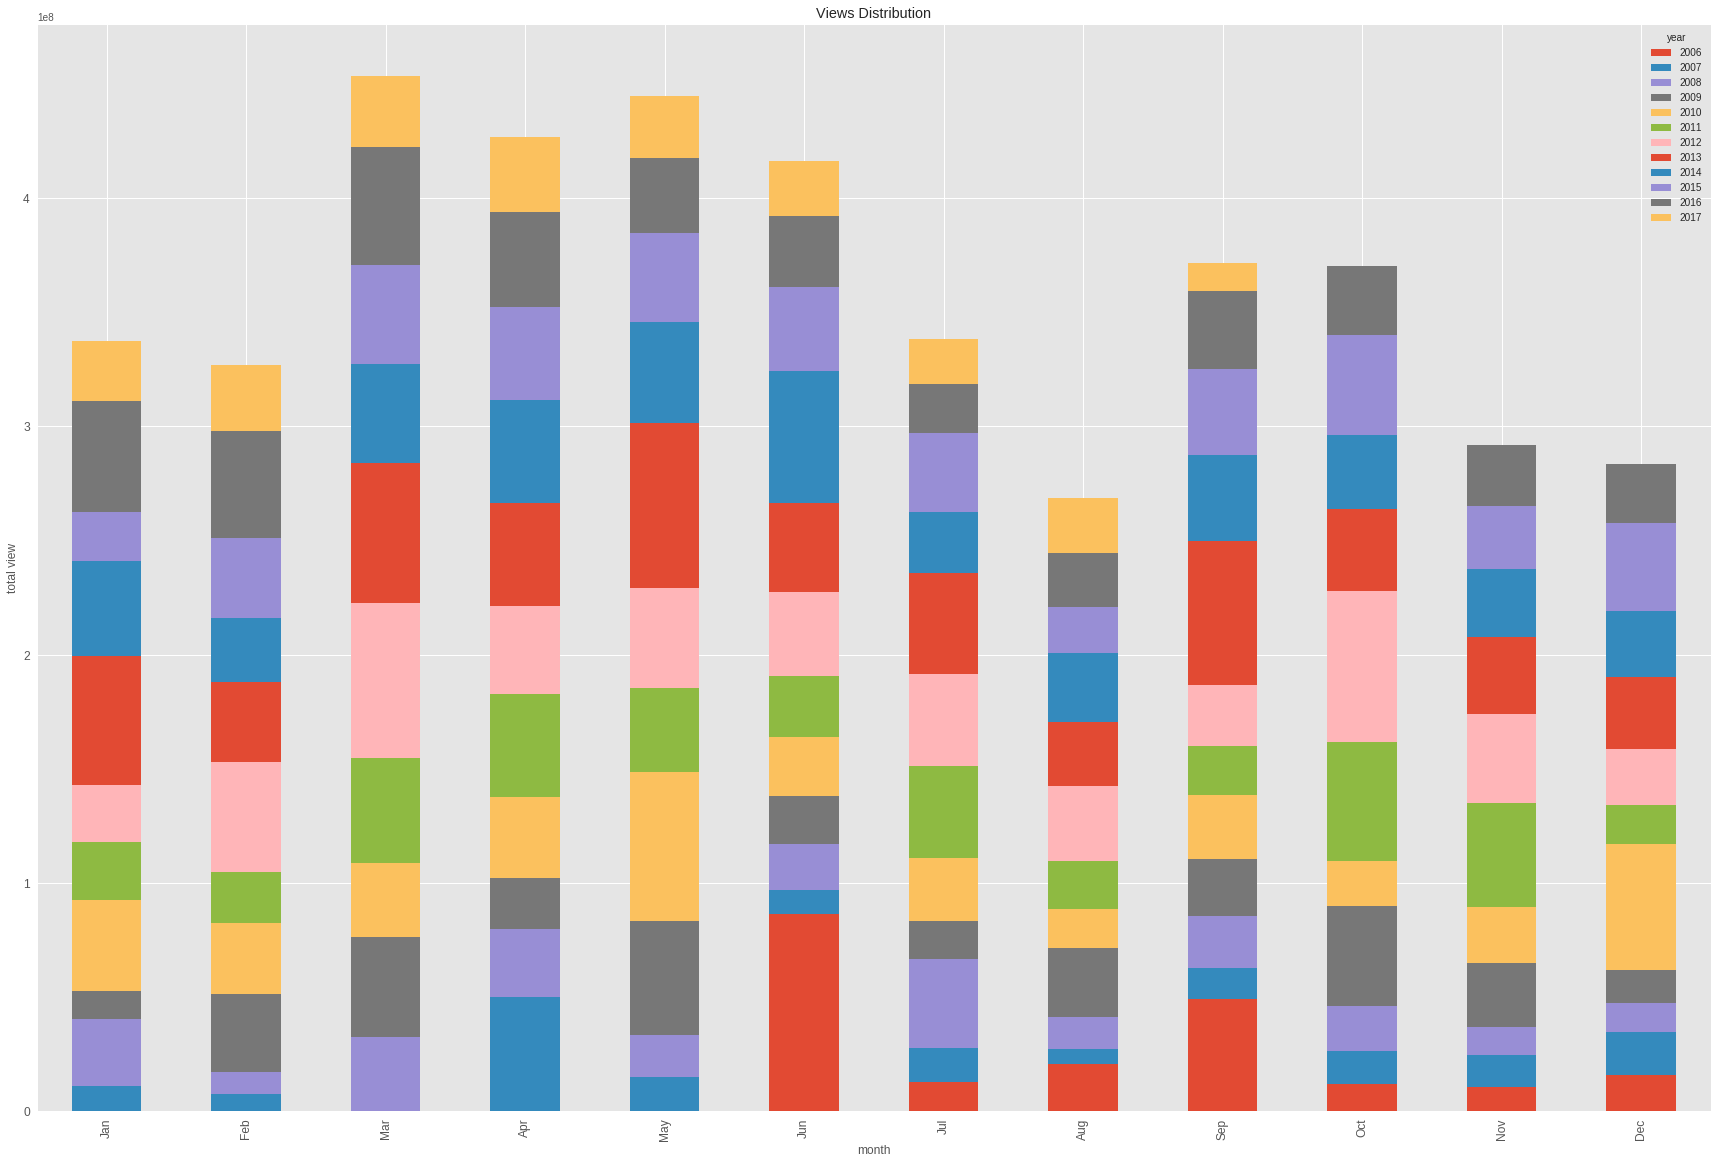

In [441]:
views_data.plot(kind = 'bar',title ="Views Distribution", stacked = True, figsize=(30, 20), legend=True, fontsize=12)
plt.xlabel("month")
plt.ylabel("total view")
plt.show()

### Observations:

 * The above bar plot, also known as a stacked bar graph, shows the distribituion of the views (received on TED talk  videos) across the different months in a year. These years vary from 2006 until Septemeber 2017 and help us compare total number of views on videos and notice changes and identify the trends that influence this data across the years.

 * We can obsevere that most popular months for these videos posted on the TED talk platform are from March to June.    All of these months individually have surpassed more than 400 million views across the years.  

 * These are followed by months such as Jan, Feb, July, September, October. For the month of Jan the cumilative number  of views is aprroximately 330 million through the years, closesly followed by Feb. The months of July, September,   October all have accumated views above 350 million,

 * Whereas the most unpopular months August, Novemeber, December which all have total views below the 300 million mark.

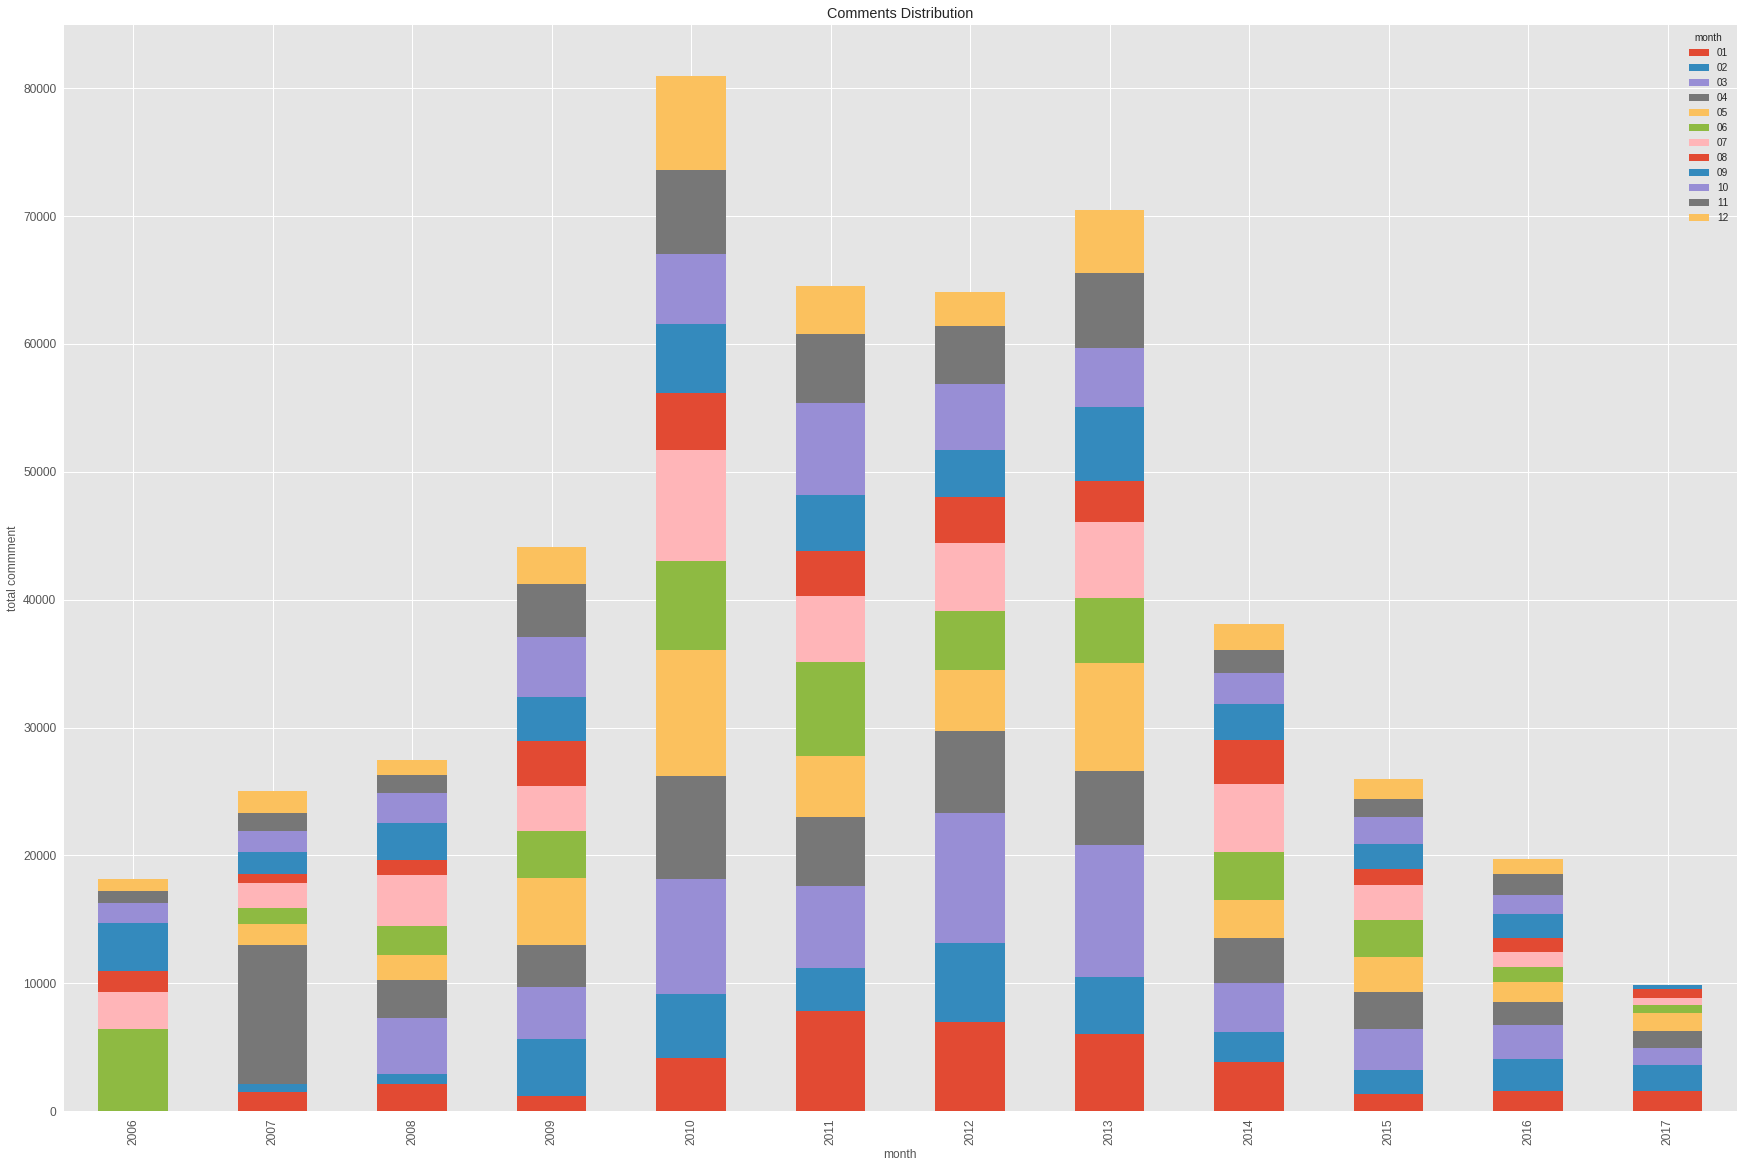

In [442]:
comments_data.plot(kind = 'bar',title ="Comments Distribution", stacked = True, figsize=(30, 20), legend=True, fontsize=12)
plt.xlabel("month")
plt.ylabel("total commment")
plt.show()

## Observations:

* This above bar plot shows us the distrubtion of the number of comments recieved on Ted talk videos across the months in a year. It shows the variation in the cumilative number of comments recieved on videos through the years and ghelps establish relationship between the comments and the months. 

* Through the data it can be observed that the most popular months which have received the most comments are from March to July. The month of March leads with more than 50,000 cumilative comments recived on videos, through the years closely followed by the month of April.

* The months from May-July each have approximately more than 45,000 comments on the videos from that month. Whereas the most unpoular months are August and Decemeber, with lower than 30,000 comments.


Note that some data is missing from Jan 2006 to May 2006 as well as from October 2017 to December.Therefore these missing values have been replaced by zero in thr above plots to find a general trend from the year 2006-2017.

From the two above graphs, we can see a correlation and a trend between which months are the most popular through the years. In both the distributions, it is clear that March has the highest cumilative views and comments through the years. Comparing the other months also we see the same trends in both of these stacked bar graphs. The months of Jan, Feb, September, October generally lie within the average views/comments. Whereas the least popular months acording to both bar plots are August and Decemeber. 


## Part 2: Correlation between views, comments, and languages
In this section , we will try to determine if there is a correlation between the number of views and the number of comments, for example, an increased number of views should also imply an increased number of comments. We will also determine if there is an increase in the number of views given a larger availability of languages used in a specific video.

![](https://tedconfblog.files.wordpress.com/2017/10/tedxglobalday_locations.gif?1513369570)

In [443]:
# Add a column containing uniquely the years
df['year'] = df['published_date'].str.replace('([0-9]+)-','').astype(int)

In [444]:
# Discretize year into six time periods
bins = [2006,2008,2010,2012,2014,2016,2018]
group_names=['period_1','period_2','period_3','period_4','period_5','period_6']
df['period'] = pd.cut(df['year'],bins,right=False, labels=group_names)
df.head()

,event,name,views,ratings,comments,languages,speaker_occupation,published_date,year,period
0,TED2006,Ken Robinson: Do schools kill creativity?,47227110,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",4553,60,Author/educator,06-2006,2006,period_1
1,TED2006,Al Gore: Averting the climate crisis,3200520,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",265,43,Climate advocate,06-2006,2006,period_1
2,TED2006,David Pogue: Simplicity sells,1636292,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",124,26,Technology columnist,06-2006,2006,period_1
3,TED2006,Majora Carter: Greening the ghetto,1697550,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",200,35,Activist for environmental justice,06-2006,2006,period_1
4,TED2006,Hans Rosling: The best stats you've ever seen,12005869,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",593,48,Global health expert; data visionary,06-2006,2006,period_1


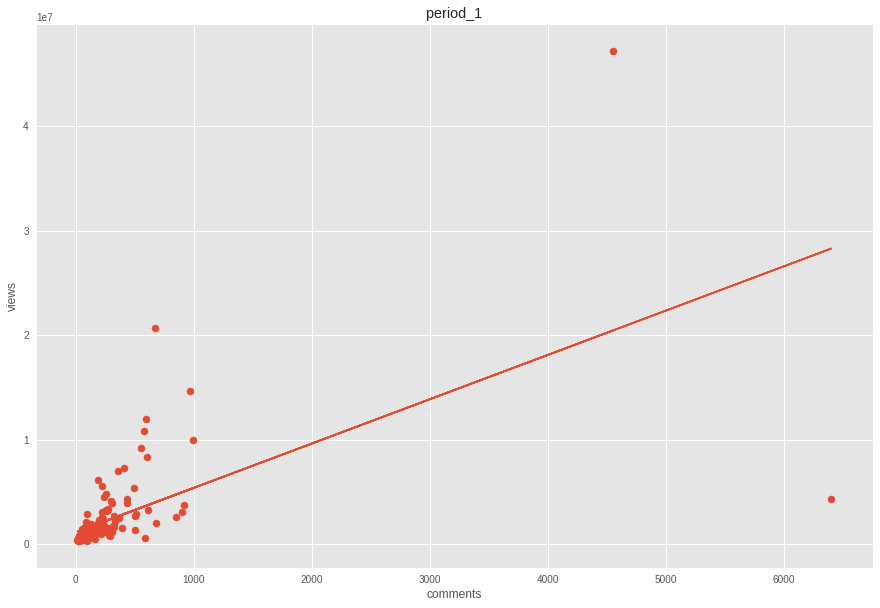

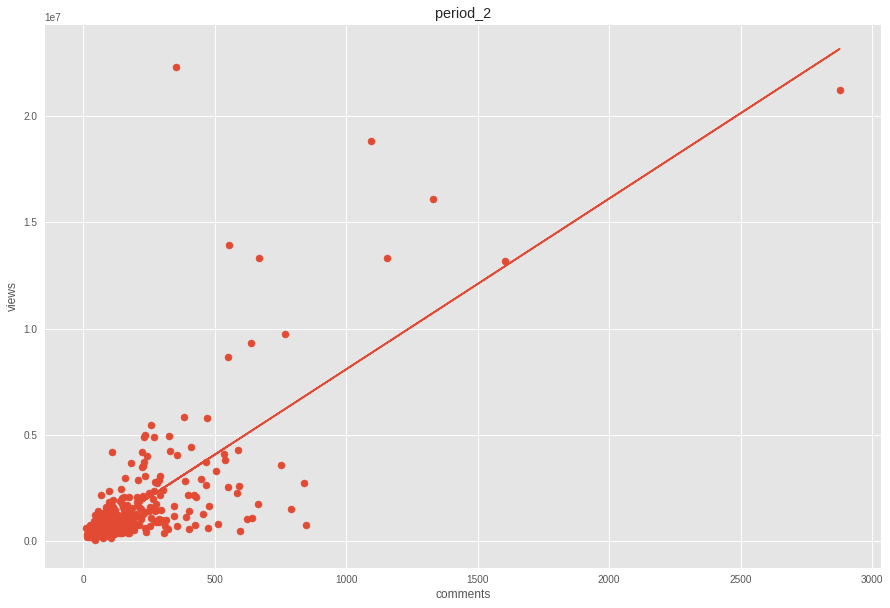

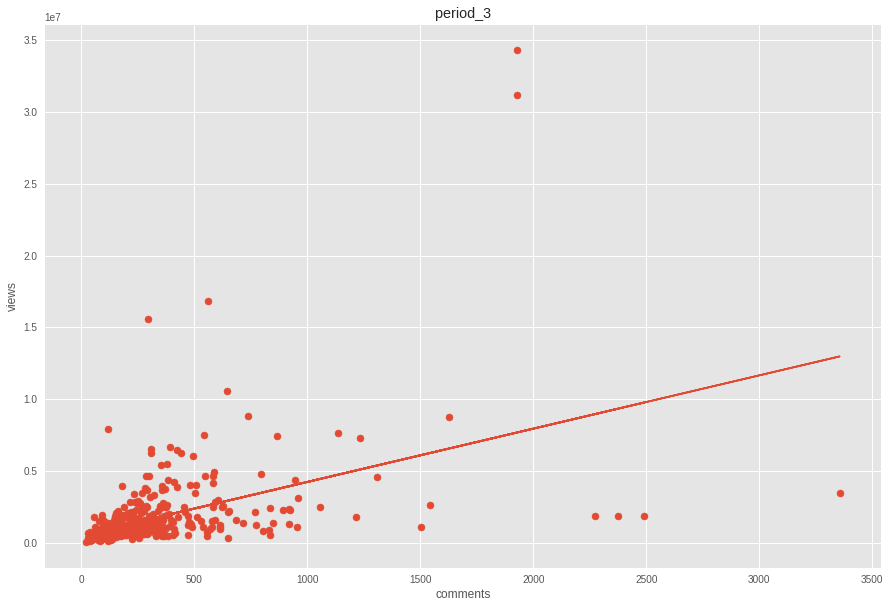

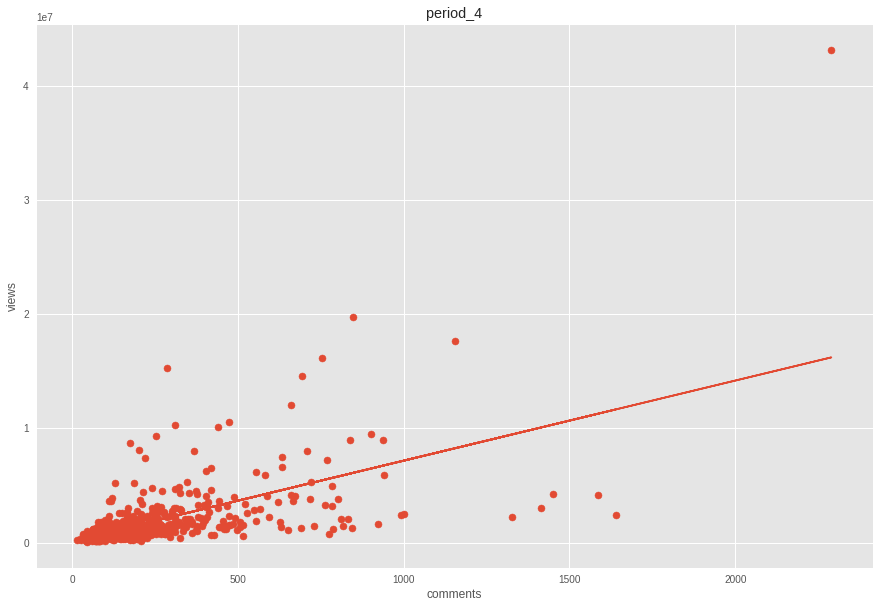

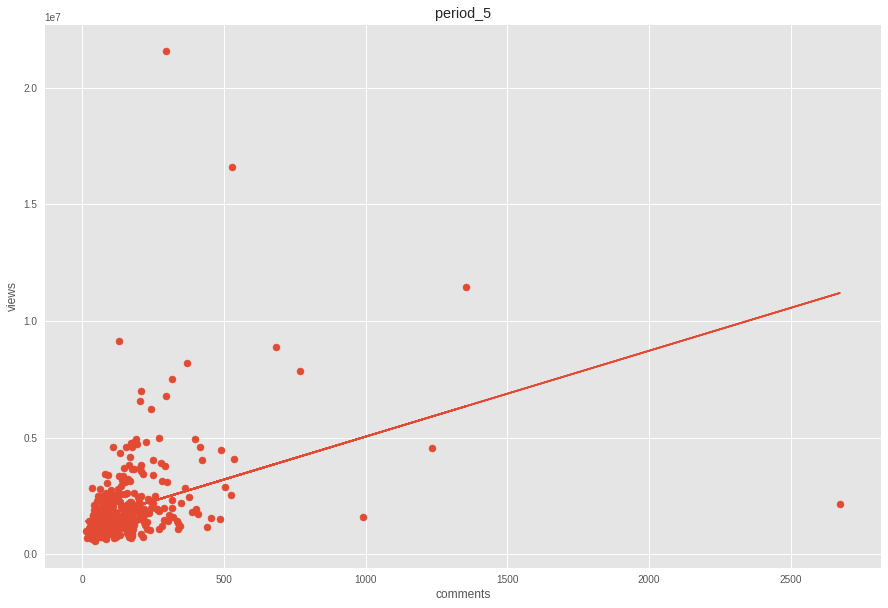

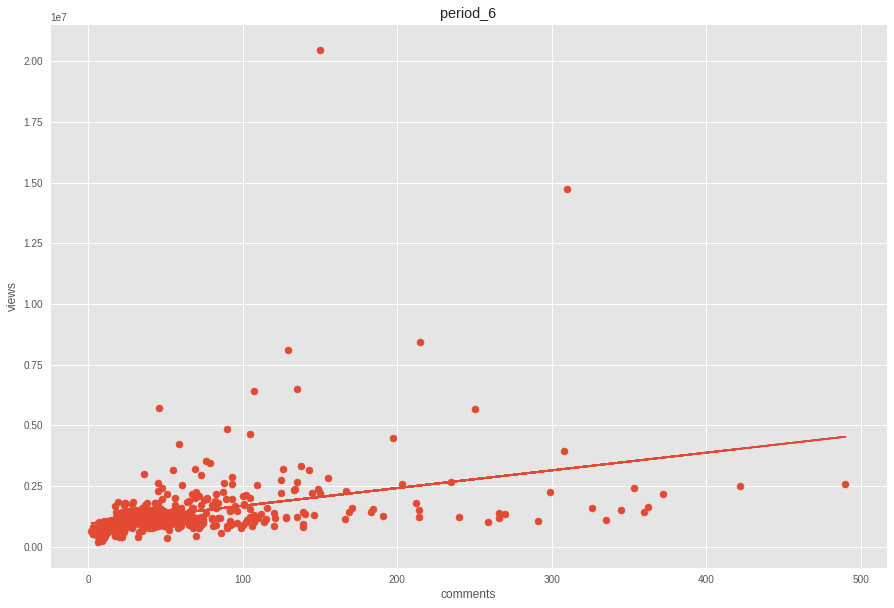

In [445]:
# Making a scatterplot showing the number of views vs. 
# the number of comments for each of the six time periods.
for period in group_names:
    s = df[df.period  == period]
    x_data = s['comments'].values
    y_data = s['views'].values
    # Making a scatter plot and drawing a regression line 
    fit = np.polyfit(x = x_data,y = y_data,deg = 1)
    plt.figure(figsize = (15,10))
    plt.plot(x_data, fit[0] * x_data + fit[1])
    plt.scatter(x_data, y_data)
    plt.xlabel("comments")
    plt.ylabel("views")
    plt.title(period)
    plt.show()

In [446]:
df[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


## Observations:
* For the above scatterplots, we divided them into 6 periods from the year 2006-2017. This is done in order to see if there are any specific trends that can be observed which influence the correaltion between views and comments. We chose a small range to divide the periods, in order to inspect any specific correlations between that perioid. 

* But overall we can observe through the regression lines in each of these plots that there is a high correlation between these two aspects - comments and views. The more the number of views on a video, the more is the number of comments as expected. From the above calculation also we see that the the pearson coefficient for the above data is **a little higher more than 0.5**. This supports our observation and suggests a **medium to strong correlation** between the two quantities. 

* This can further be seen through the more general scatter plot below, where all the above scatter plots are combined in to one. This too shows quite a strong correlation between comments and views.

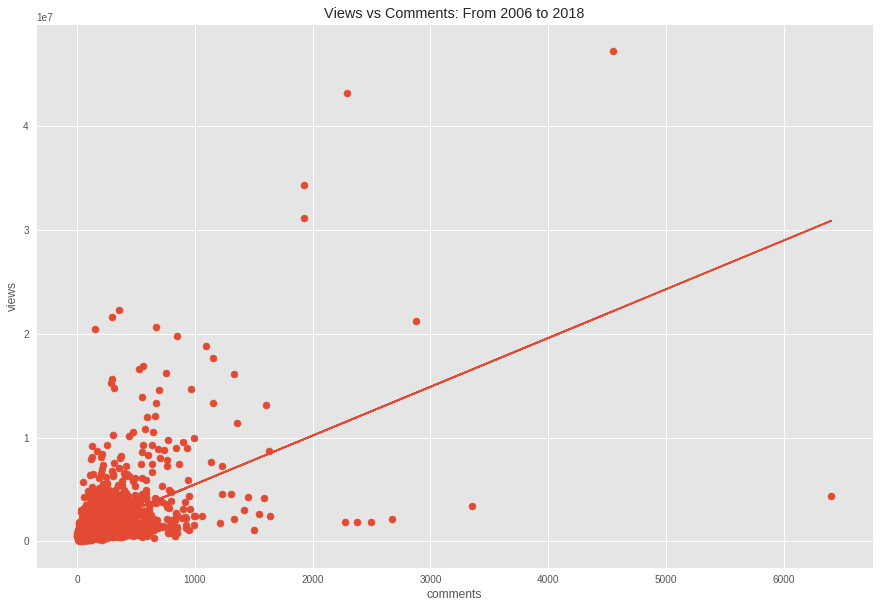

In [447]:
x_data = df['comments'].values
y_data = df['views'].values
# Making a scatter plot and drawing a regression line 
fit = np.polyfit(x = x_data,y = y_data,deg = 1)
plt.figure(figsize = (15,10))
plt.plot(x_data, fit[0] * x_data + fit[1])
plt.scatter(x_data, y_data)
plt.xlabel("comments")
plt.ylabel("views")
plt.title('Views vs Comments: From 2006 to 2018')
plt.show()

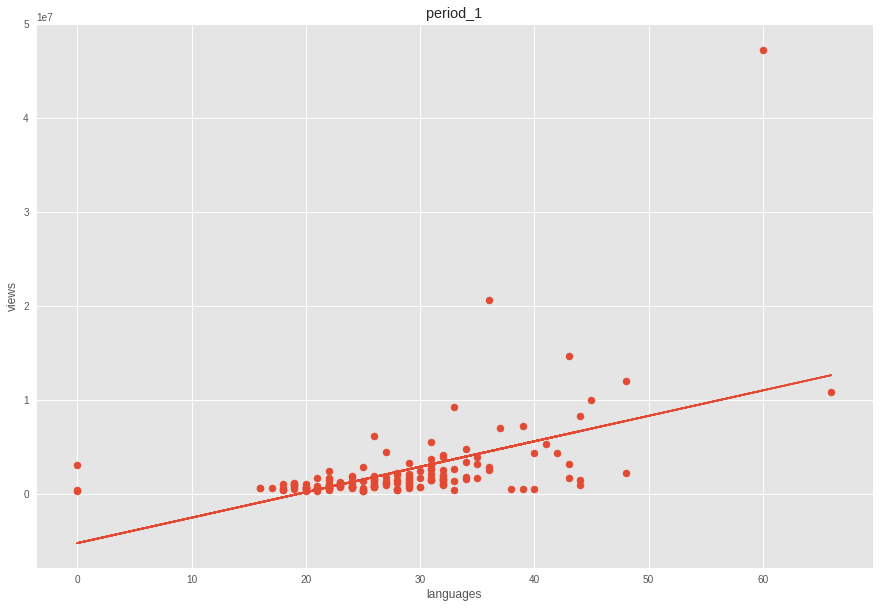

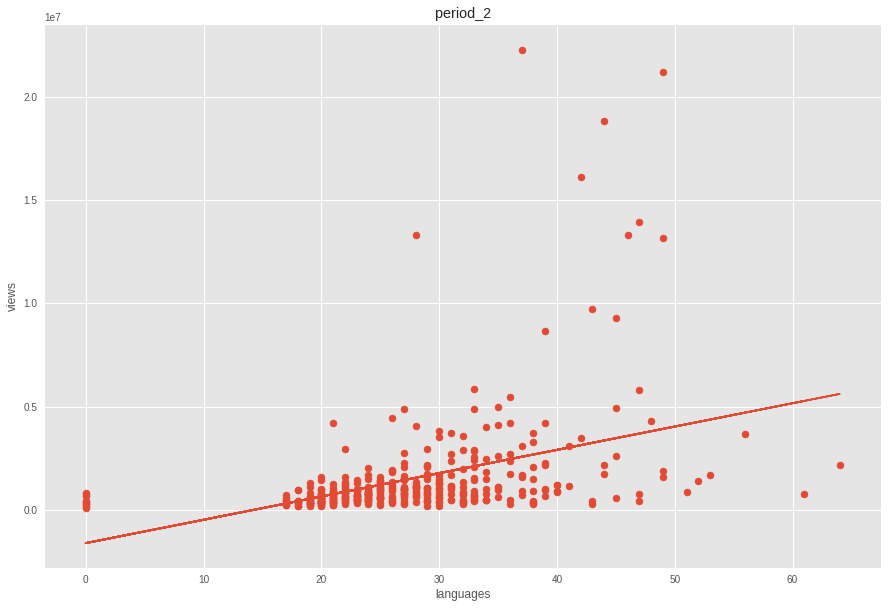

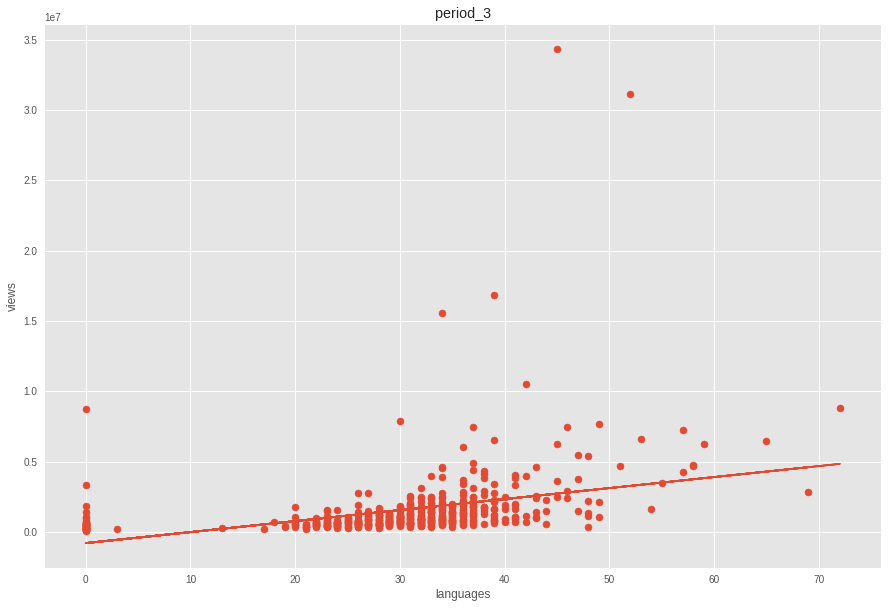

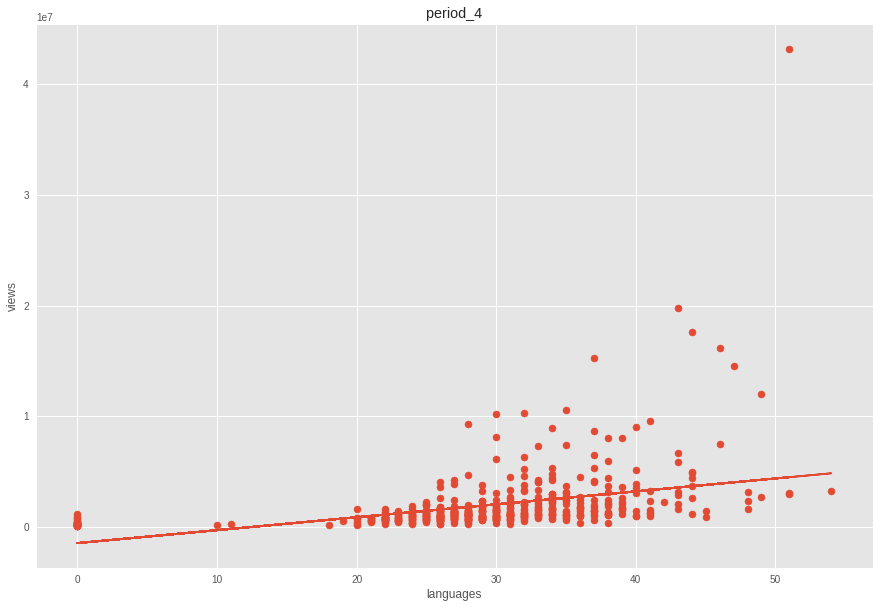

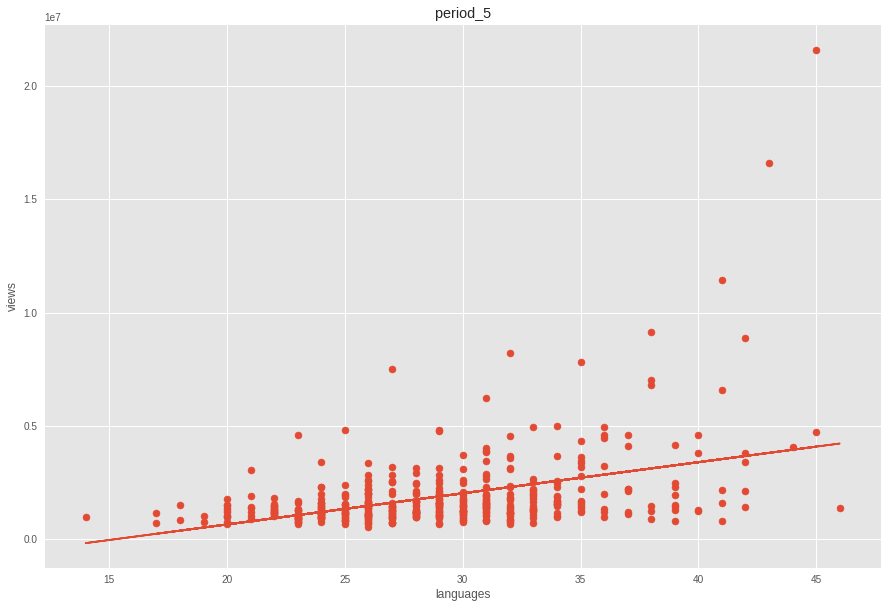

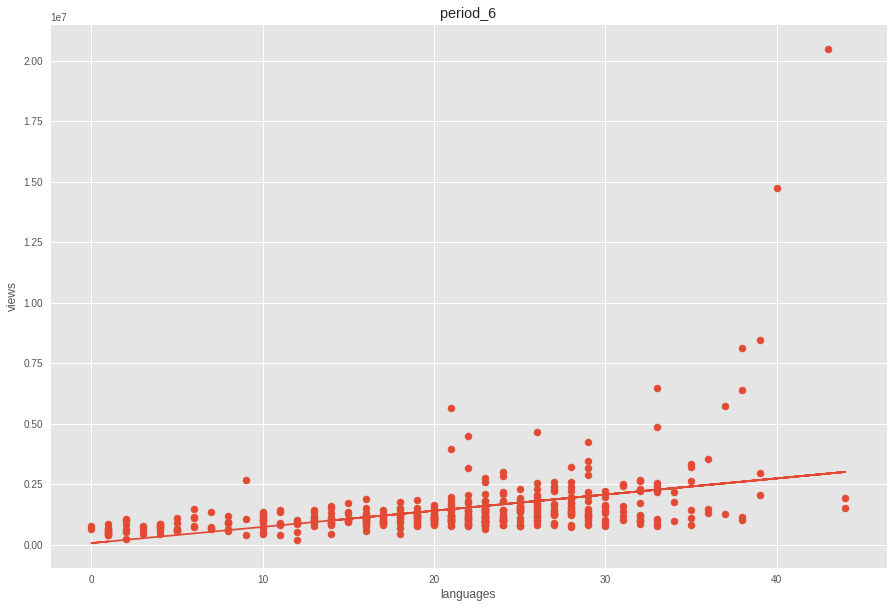

In [448]:
# Making a scatterplot showing the number of views vs. 
# the number of comments for each of the six time periods.
for period in group_names:
    s = df[df.period  == period]
    x_data = s['languages'].values
    y_data = s['views'].values
    # Making a scatter plot and drawing a regression line 
    fit = np.polyfit(x = x_data,y = y_data,deg = 1)
    plt.figure(figsize = (15,10))
    plt.plot(x_data, fit[0] * x_data + fit[1])
    plt.scatter(x_data, y_data)
    plt.xlabel("languages")
    plt.ylabel("views")
    plt.title(period)
    plt.show()

In [449]:
df[['views', 'languages']].corr()

,views,languages
views,1.000000,0.377623
languages,0.377623,1.000000


## Observations: 

* The scatterplot above shows how the number of languages a TED talk is offered in have affects the number of views. Through the scatter plots it can be seen that the episodes which have the most views are the episodes which have been translated into 20-50 languages. 

* For these plots, the data was split in to 6 periods to observe specific correaltion and trends and have a better understaning through the years.      

* Therefore it can be concluded that TED talks are being reviewed and watched globally across many countries. The presence of subtitles in many languages has certainly contributed to the growing popularity of TED and the views it gets. The Pearson coefficient as calculated **above is 0.38**, which too suggests a **medium correlation** between languages and views.

* The bar plot below shows the combined correlation between the two aspect and shows a definite realtionship between languages and views. This is due to the facts its more accessible to a larger number of audience.

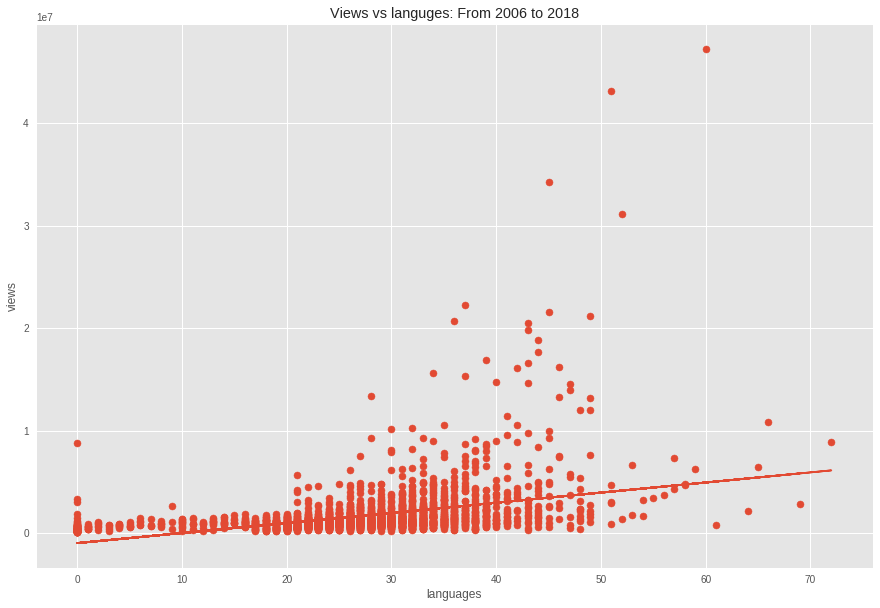

In [450]:
x_data = df['languages'].values
y_data = df['views'].values
# Making a scatter plot and drawing a regression line 
fit = np.polyfit(x = x_data,y = y_data,deg = 1)
plt.figure(figsize = (15,10))
plt.plot(x_data, fit[0] * x_data + fit[1])
plt.scatter(x_data, y_data)
plt.xlabel("languages")
plt.ylabel("views")
plt.title('Views vs languges: From 2006 to 2018')
plt.show()

## Part 3: Popular Ratings
Here, we are trying to identify what were the popular ratings given to these TED talks.
The TED talk website allows the users to rate the talks posted on wide range of scales. Therefore in this secion below we are going to analalyze the data too see how many people found a particular talk funny, beautiful, inspiring, creative and other verbs.

![](https://assets.wired.com/photos/w_1200/wp-content/uploads/2015/10/reactionsgif.gif)

In [451]:
# we are going to update the rating column according to the most selected rating for each name
r = []
y = []

arr = df['ratings'].str.split('\'')
for i, row in df.iterrows():
    r.append(arr[i][5])
    y.append(arr[i][8])
df['ratings'] = pd.DataFrame(r)
df['count_rating'] = pd.DataFrame(y)
df['count_rating'] = df['count_rating'].str.replace(':','')
df['count_rating'] = df['count_rating'].str.replace('}, {','').astype(int)
df.head()

,event,name,views,ratings,comments,languages,speaker_occupation,published_date,year,period,count_rating
0,TED2006,Ken Robinson: Do schools kill creativity?,47227110,Funny,4553,60,Author/educator,06-2006,2006,period_1,19645
1,TED2006,Al Gore: Averting the climate crisis,3200520,Funny,265,43,Climate advocate,06-2006,2006,period_1,544
2,TED2006,David Pogue: Simplicity sells,1636292,Funny,124,26,Technology columnist,06-2006,2006,period_1,964
3,TED2006,Majora Carter: Greening the ghetto,1697550,Courageous,200,35,Activist for environmental justice,06-2006,2006,period_1,760
4,TED2006,Hans Rosling: The best stats you've ever seen,12005869,Ingenious,593,48,Global health expert; data visionary,06-2006,2006,period_1,3202


In [452]:
# 
rate = df['ratings'].as_matrix()
d = np.unique(rate)
rate_count = pd.DataFrame(df.groupby(rate)["ratings"].count())
df
#rate_count

,event,name,views,ratings,comments,languages,speaker_occupation,published_date,year,period,count_rating
0,TED2006,Ken Robinson: Do schools kill creativity?,47227110,Funny,4553,60,Author/educator,06-2006,2006,period_1,19645
1,TED2006,Al Gore: Averting the climate crisis,3200520,Funny,265,43,Climate advocate,06-2006,2006,period_1,544
2,TED2006,David Pogue: Simplicity sells,1636292,Funny,124,26,Technology columnist,06-2006,2006,period_1,964
3,TED2006,Majora Carter: Greening the ghetto,1697550,Courageous,200,35,Activist for environmental justice,06-2006,2006,period_1,760
4,TED2006,Hans Rosling: The best stats you've ever seen,12005869,Ingenious,593,48,Global health expert; data visionary,06-2006,2006,period_1,3202
5,TED2006,Tony Robbins: Why we do what we do,20685401,Funny,672,36,Life coach; expert in leadership psychology,06-2006,2006,period_1,1102
6,TED2006,Julia Sweeney: Letting go of God,3769987,Courageous,919,31,"Actor, comedian, playwright",07-2006,2006,period_1,477
7,TED2006,Joshua Prince-Ramus: Behind the design of Seat...,967741,Ingenious,46,19,Architect,07-2006,2006,period_1,195
8,TED2006,Dan Dennett: Let's teach religion -- all relig...,2567958,Courageous,852,32,"Philosopher, cognitive scientist",07-2006,2006,period_1,562
9,TED2006,Rick Warren: A life of purpose,3095993,Unconvincing,900,31,"Pastor, author",07-2006,2006,period_1,838


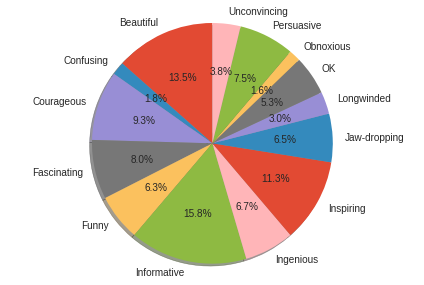

In [453]:
plt.pie(rate_count, labels = d,  shadow = True, startangle = 90, autopct = '%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()
fig = plt.figure(figsize=[50, 50])

The above bar plot shows the different ratings that have been given to these TED talks through the website. It shows the different percentages of each rating. The most commonly given rating is informative which is by 15.8% by the users while the least common one is Obnoxious which is given by only 1.6% of the users.

Overall it can be seen that most users give positvie rating such as Persuasive, Jaw-dropping, Inspiring, Beautiful etc and very few percentage of people actualy give low/poor ratings. 

In [454]:
f = df[df.ratings  == 'Funny']
f = f[['name', 'views', 'published_date', 'ratings', 'count_rating']].sort_values('count_rating', ascending=False)[:10]
f

,name,views,published_date,ratings,count_rating
0,Ken Robinson: Do schools kill creativity?,47227110,06-2006,Funny,19645
2114,James Veitch: This is what happens when you re...,20475972,01-2016,Funny,7731
675,"Sebastian Wernicke: Lies, damned lies and stat...",2212944,04-2010,Funny,5552
685,"Julia Sweeney: It's time for ""The Talk""",3362099,05-2010,Funny,4025
747,Maz Jobrani: Did you hear the one about the Ir...,4646183,08-2010,Funny,4013
692,Ken Robinson: Bring on the learning revolution!,7266316,05-2010,Funny,3000
47,Richard St. John: 8 secrets of success,10841210,12-2006,Funny,2966
21,Ze Frank: Nerdcore comedy,6141440,08-2006,Funny,2799
43,Michael Shermer: Why people believe weird things,5364639,11-2006,Funny,2751
1059,Charlie Todd: The shared experience of absurdity,2758792,11-2011,Funny,2401


In [455]:
o = df[df.ratings  == 'OK']
o = o[['name', 'views', 'published_date', 'ratings', 'count_rating']].sort_values('count_rating', ascending=False)[:10]
o

,name,views,published_date,ratings,count_rating
1682,Roselinde Torres: What it takes to be a great ...,3685420,02-2014,OK,658
767,Jessa Gamble: Our natural sleep cycle is nothi...,2244295,09-2010,OK,607
1170,Larry Smith: Why you will fail to have a great...,5917201,03-2012,OK,537
401,Pattie Maes + Pranav Mistry: Meet the SixthSen...,9753630,03-2009,OK,444
688,Graham Hill: Why I'm a weekday vegetarian,2108816,05-2010,OK,438
1064,Thomas Suarez: A 12-year-old app developer,6503775,11-2011,OK,361
259,Helen Fisher: The brain in love,4883112,07-2008,OK,347
1390,"Paolo Cardini: Forget multitasking, try monota...",2324212,11-2012,OK,328
771,Steven Johnson: Where good ideas come from,3951683,09-2010,OK,298
754,Dan Cobley: What physics taught me about marke...,1373377,08-2010,OK,297


In [456]:
o = df[df.ratings  == 'Obnoxious']
o = o[['name', 'views', 'published_date', 'ratings', 'count_rating']].sort_values('count_rating', ascending=False)[:10]
o

,name,views,published_date,ratings,count_rating
1770,Jamila Lyiscott: 3 ways to speak English,3916554,06-2014,Obnoxious,304
428,"Tim Ferriss: Smash fear, learn anything",2771442,04-2009,Obnoxious,208
1284,Marc Goodman: A vision of crimes in the future,1217317,07-2012,Obnoxious,156
785,Stacey Kramer: The best gift I ever survived,3450119,10-2010,Obnoxious,133
1013,Kate Hartman: The art of wearable communication,872169,09-2011,Obnoxious,114
895,Paul Root Wolpe: It's time to question bio-eng...,1226731,03-2011,Obnoxious,95
1306,Mark Applebaum: The mad scientist of music,3600582,08-2012,Obnoxious,89
1573,Chrystia Freeland: The rise of the new global ...,1909640,09-2013,Obnoxious,87
1161,Paul Gilding: The Earth is full,1174189,02-2012,Obnoxious,86
446,Eric Lewis: Chaos and harmony on piano,391427,05-2009,Obnoxious,84


# Part 4: Speakers and their professional life

In this section, we will analyze speakers and their professions. We will try understanding which speakers are appricieated the most and which professions they belong to.

![](https://viceland-assets-cdn.vice.com/viceblog/46159060TED-gestures.jpg?crop=1xw:0.9953181818181818xh;center,center&resize=0:*)



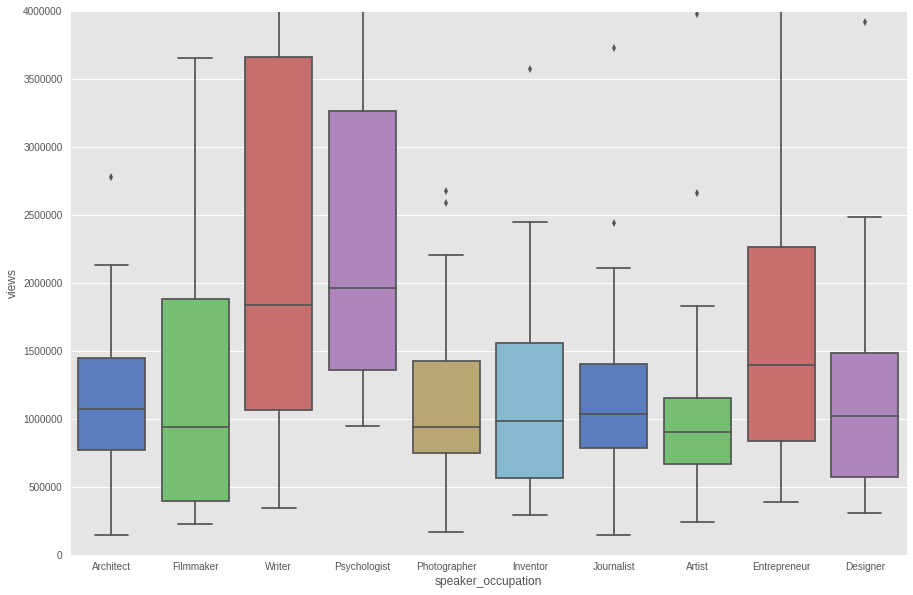

In [463]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 10))
sns.boxplot(x='speaker_occupation', y='views', data=df[df['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])
plt.show()

From the above bar plot we can predict that on an average, out of the topmost popular professions speaking at the TED talks, Psychologists tend to attract the most views. Wheras it can be seen writers have the greatest range of views between ranging from 100 million 350 million views.


### Summary and Refrences

This tutorial covered some basic ways to observe, interpret, analyze, interact with data from TED talks.
I hope you have enjoyed the python tutorial on how to analyze and interpet data of Ted Talks, thank you. If you are interested in learning more about any of the topics or tools used, please feel free to visit the following websites.

* TED: https://www.ted.com/talks
* Kaggle: https://www.kaggle.com/rounakbanik/ted-talks
* Pandas: https://pandas.pydata.org/
* Matplotlib: https://matplotlib.org/
* Numpy: http://www.numpy.org/
* Plotly: https://plot.ly/
* Codewall: https://coderwall.com/p/-uuawg/how-do-i-convert-a-unix-timestamp-to-human-readable-format-in-python
* Pythonspot: https://pythonspot.com/matplotlib-pie-chart/